# Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Collective data

In [7]:
df = pd.read_csv('../datasets/apartments_collective.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17932 entries, 0 to 17931
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           17932 non-null  int64  
 1   url                                  17932 non-null  object 
 2   name/title                           17932 non-null  object 
 3   address                              17932 non-null  object 
 4   price                                17932 non-null  float64
 5   area                                 17932 non-null  float64
 6   price-per-area                       17932 non-null  float64
 7   floor/store                          17932 non-null  int64  
 8   no of floors/stores in the building  17932 non-null  int64  
 9   no of rooms                          17932 non-null  int64  
 10  year of construction                 17932 non-null  float64
 11  parking space               

In [4]:
df.head()

,Unnamed: 0,url,name/title,address,price,area,price-per-area,floor/store,no of floors/stores in the building,no of rooms,year of construction,parking space,market,form of ownership,location,latitude,longitude,distance,district
0,0,https://krakow.nieruchomosci-online.pl/mieszka...,Mieszkanie Kraków,"103171, Mistrzejowice, Kraków, małopolskie",1087000.0,74.80,14532.09,6,7,3,2016.0,True,wtórny,pełna własność,"Mistrzejowice, Kraków, województwo małopolskie...",50.097426,20.009603,6.500728,Mistrzejowice
1,1,https://krakow.nieruchomosci-online.pl/mieszka...,Mieszkanie Kraków,"2 Pułku Lotniczego, Kraków, małopolskie",550000.0,32.00,17187.50,4,8,1,2012.0,False,wtórny,pełna własność,"2, Osiedle 2 Pułku Lotniczego, Czyżyny, Kraków...",50.077806,20.012307,5.639111,Czyżyny
2,2,https://krakow.nieruchomosci-online.pl/mieszka...,Mieszkanie Kraków,"2 Pułku Lotniczego, Kraków, małopolskie",550000.0,32.30,17028.00,4,10,1,1985.0,False,wtórny,pełna własność,"2, Osiedle 2 Pułku Lotniczego, Czyżyny, Kraków...",50.077806,20.012307,5.639111,Czyżyny
3,3,https://krakow.nieruchomosci-online.pl/mieszka...,"Apartament, ul. 28 Lipca 1943","28 Lipca 1943, Wola Justowska, Kraków, małopol...",2290000.0,155.16,14758.96,0,2,5,2009.0,True,wtórny,pełna własność,"28 Lipca 1943, Wola Justowska, Zwierzyniec, Kr...",50.062710,19.872002,4.662523,Zwierzyniec
4,4,https://krakow.nieruchomosci-online.pl/mieszka...,"Mieszkanie, ul. 28 Lipca 1943","28 Lipca 1943, Wola Justowska, Kraków, małopol...",2399000.0,139.00,17258.99,1,2,3,2022.0,False,wtórny,pełna własność,"28 Lipca 1943, Wola Justowska, Zwierzyniec, Kr...",50.062710,19.872002,4.662523,Zwierzyniec


### Preparing  data for analysis

In [13]:
# Drop unnecessary columns

columns_to_drop = ['Unnamed: 0', 'url', 'name/title', 'address', 'location', 'form of ownership', 'district', 'price']

df_reduced = df.drop(columns=columns_to_drop)

In [4]:
df_reduced['market'].unique()

array(['wtórny', 'pierwotny'], dtype=object)

In [23]:
df['form of ownership'].unique()

array(['pełna własność', 'spółdzielcze wł. prawo do lokalu', 'udział',
       'użytkowanie wieczyste / dzierżawa'], dtype=object)

In [14]:
df_reduced['market'] = df_reduced['market'].map({'pierwotny': 0, 'wtórny': 1})

In [63]:
df_reduced['market'].unique()

array([1, 0], dtype=int64)

In [25]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17932 entries, 0 to 17931
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   area                                 17932 non-null  float64
 1   price-per-area                       17932 non-null  float64
 2   floor/store                          17932 non-null  int64  
 3   no of floors/stores in the building  17932 non-null  int64  
 4   no of rooms                          17932 non-null  int64  
 5   year of construction                 17932 non-null  float64
 6   parking space                        17932 non-null  bool   
 7   market                               17932 non-null  int64  
 8   latitude                             17932 non-null  float64
 9   longitude                            17932 non-null  float64
 10  distance                             17932 non-null  float64
dtypes: bool(1), float64(6), int6

### Pearson Correlation

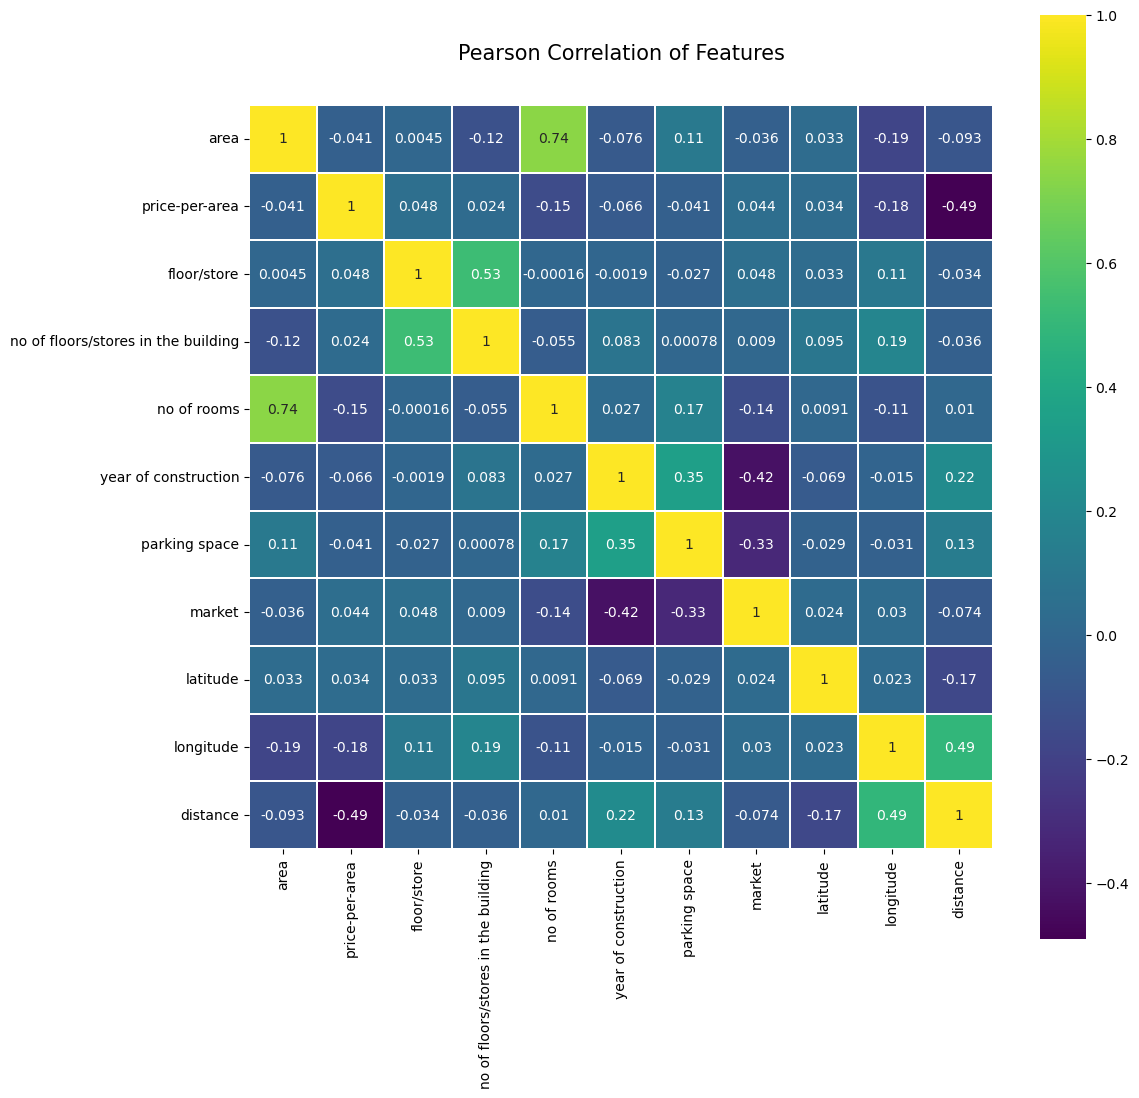

In [15]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_reduced.astype(float).corr(), linewidths=0.1, vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

### Prices in various districts

In [8]:
df['district'].unique()

array(['Mistrzejowice', 'Czyżyny', 'Zwierzyniec', 'Prądnik Biały',
       'Bieżanów-Prokocim', 'Stare Miasto', 'Prądnik Czerwony',
       'Bronowice', 'Bieńczyce', 'Krowodrza', 'Grzegórzki', 'Nowa Huta',
       'Podgórze', 'Wzgórza Krzesławickie', 'Swoszowice', 'Dębniki',
       'Podgórze Duchackie', 'Łagiewniki-Borek Fałęcki'], dtype=object)

C:\Users\katar\AppData\Local\Temp\ipykernel_13660\1071248856.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='district', y='price-per-area', data=df, errorbar='sd', palette='viridis')


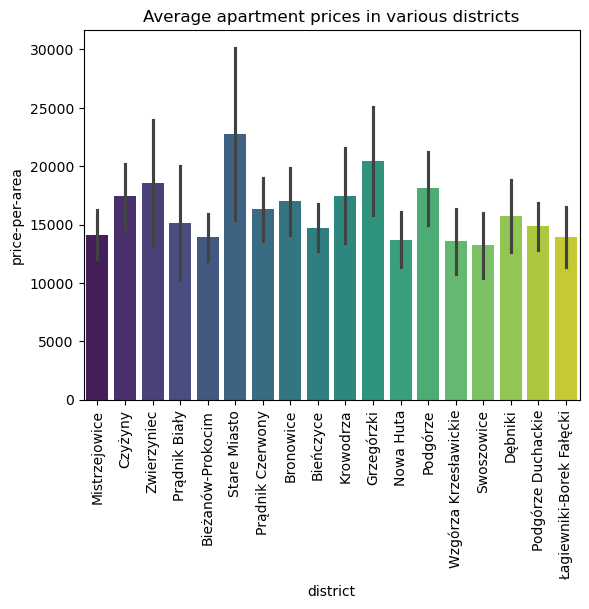

In [16]:
sns.barplot(x='district', y='price-per-area', data=df, errorbar='sd', palette='viridis') 
plt.xticks(rotation=90)
plt.title('Average apartment prices in various districts')
plt.show()

### PCA

In [16]:
attributes= list(df_reduced.columns.values)
values = df_reduced.values

In [17]:
attributes

['area',
 'price-per-area',
 'floor/store',
 'no of floors/stores in the building',
 'no of rooms',
 'year of construction',
 'parking space',
 'market',
 'latitude',
 'longitude',
 'distance']

In [18]:
values

array([[74.8, 14532.09, 6, ..., 50.09742625, 20.00960263225891,
        6.500728235137685],
       [32.0, 17187.5, 4, ..., 50.0778056, 20.0123068, 5.639111140541514],
       [32.3, 17028.0, 4, ..., 50.0778056, 20.0123068, 5.639111140541514],
       ...,
       [79.0, 21500.0, 2, ..., 50.0577378, 19.9579385,
        1.5423261347254926],
       [121.0, 22500.0, 2, ..., 50.0577378, 19.9579385,
        1.5423261347254926],
       [26.0, 24577.0, 0, ..., 50.0859311, 19.9417425, 2.695967269776532]],
      dtype=object)

#### Values normalization

In [19]:
scaler = StandardScaler()
normalized_values = scaler.fit_transform(df_reduced)

In [20]:
normalized_values

array([[ 0.63297187, -0.48521164,  1.7221561 , ...,  1.33988038,
         1.09058909,  0.85357545],
       [-0.88821641,  0.07962886,  0.77923212, ...,  0.66410642,
         1.14331527,  0.50843759],
       [-0.87755388,  0.04570112,  0.77923212, ...,  0.66410642,
         1.14331527,  0.50843759],
       ...,
       [ 0.78224736,  0.99695412, -0.16369185, ..., -0.02706828,
         0.08323567, -1.1326111 ],
       [ 2.27500222,  1.20966723, -0.16369185, ..., -0.02706828,
         0.08323567, -1.1326111 ],
       [-1.10146711,  1.65147234, -1.10661583, ...,  0.9439647 ,
        -0.23255587, -0.67049721]])

In [21]:
pca = PCA()
X_pca = pca.fit_transform(normalized_values)

C:\Users\katar\AppData\Local\Temp\ipykernel_24560\650096086.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attributes, y = pca.components_[0], order=np.array(attributes)[np.argsort(pca.components_[0])[::-1]],palette="viridis")


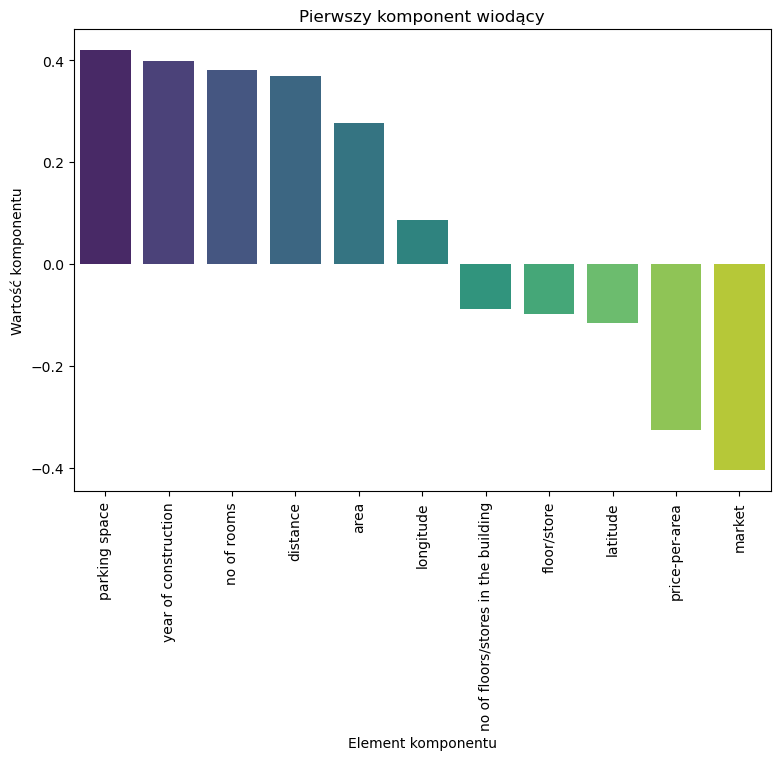

In [22]:
plt.figure(figsize=(9,6))
sns.barplot(x=attributes, y = pca.components_[0], order=np.array(attributes)[np.argsort(pca.components_[0])[::-1]],palette="viridis")
plt.xlabel('Element komponentu')
plt.xticks(rotation=90)
plt.ylabel('Wartość komponentu')
plt.title('Pierwszy komponent wiodący')
plt.show()

C:\Users\katar\AppData\Local\Temp\ipykernel_24560\2839199856.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attributes, y = pca.components_[1], order=np.array(attributes)[np.argsort(pca.components_[1])[::-1]],palette="viridis")


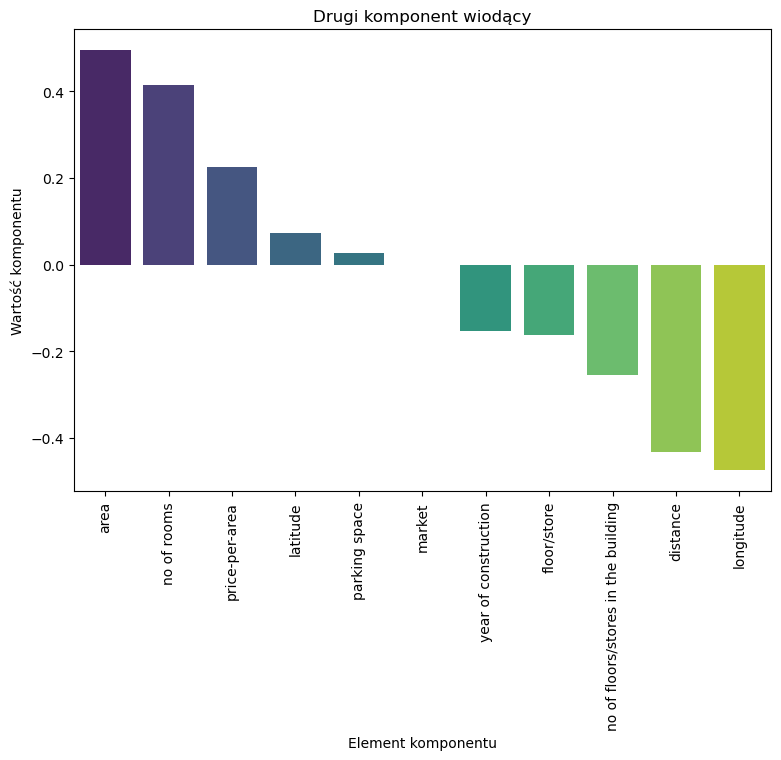

In [23]:
plt.figure(figsize=(9,6))
sns.barplot(x=attributes, y = pca.components_[1], order=np.array(attributes)[np.argsort(pca.components_[1])[::-1]],palette="viridis")
plt.xlabel('Element komponentu')
plt.xticks(rotation=90)
plt.ylabel('Wartość komponentu')
plt.title('Drugi komponent wiodący')
plt.show()

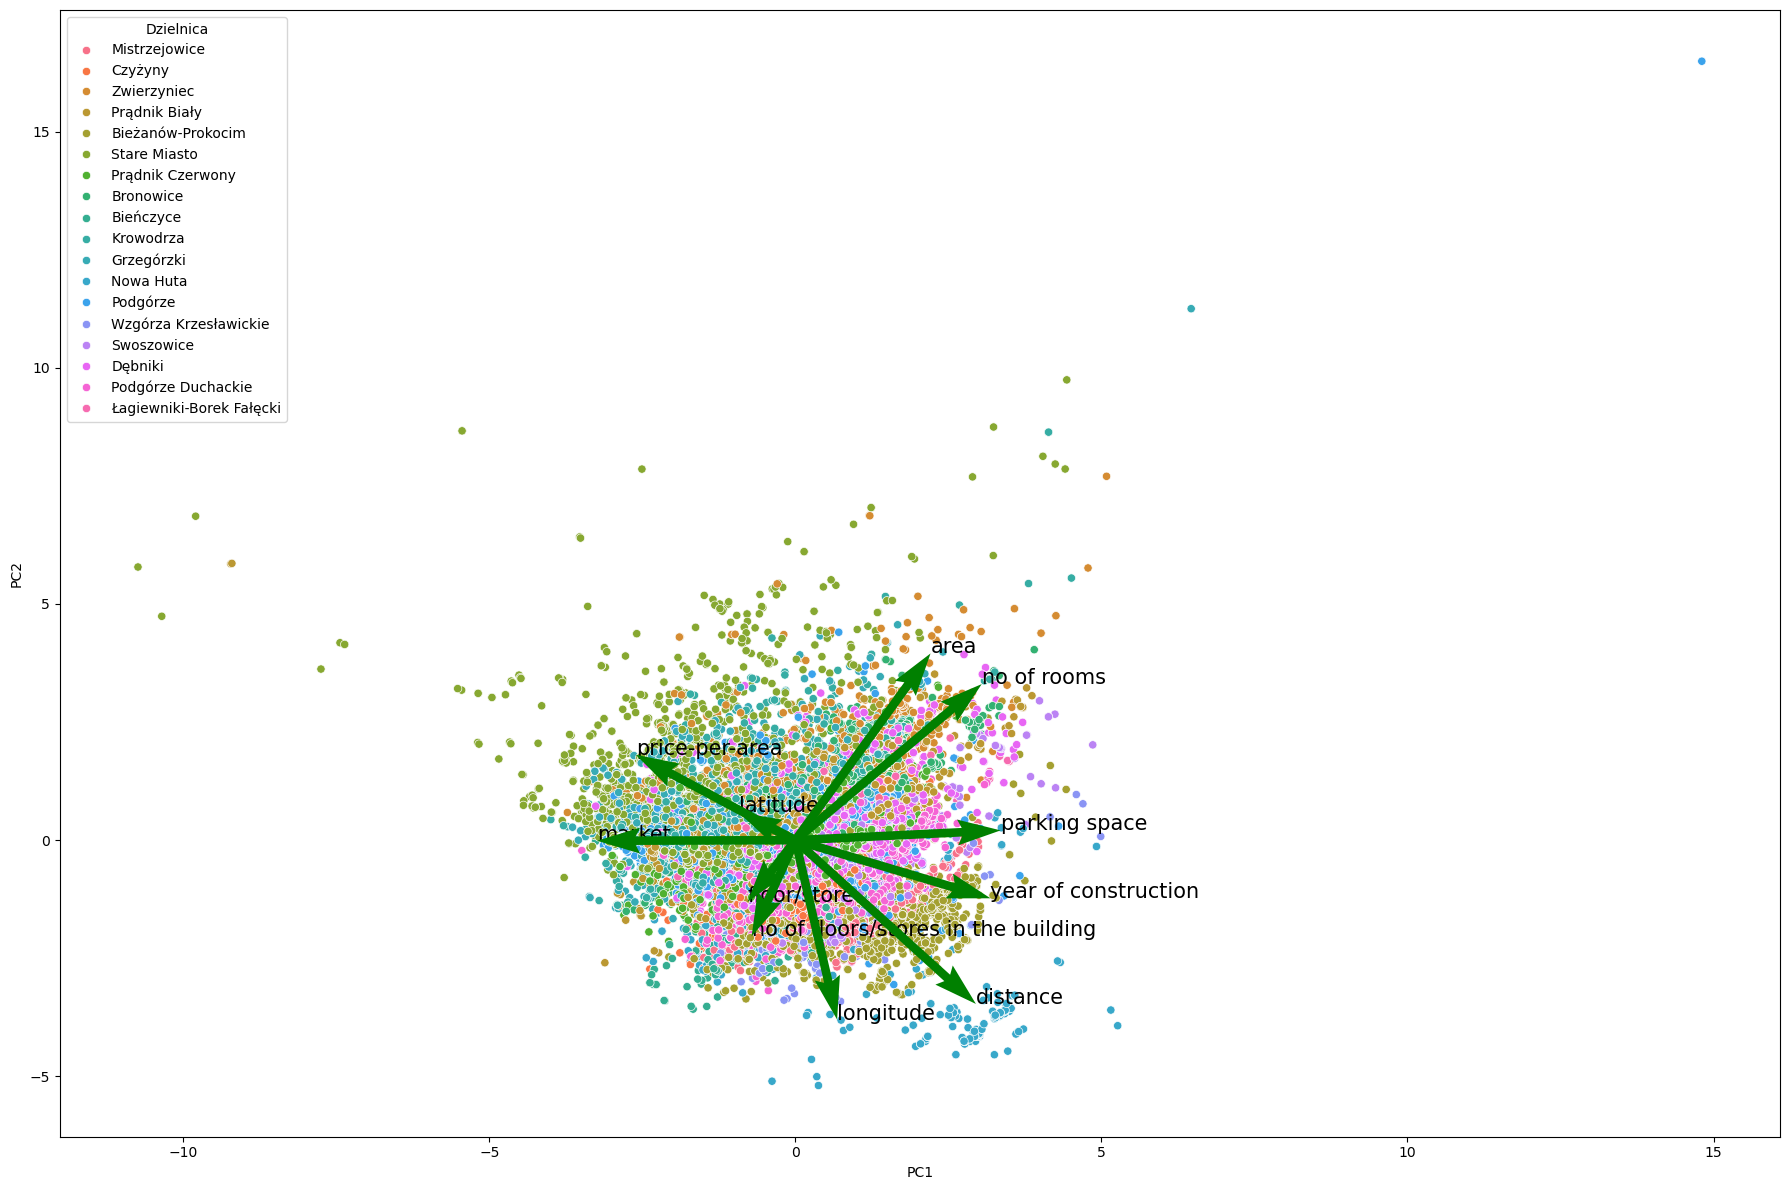

In [24]:
plt.figure(figsize=(18,12))
sp = sns.scatterplot(x=X_pca[...,0], y=X_pca[...,1], hue=df['district'])

directions = pca.components_[:2,:] @ np.identity(len(attributes))*8

sp.quiver(
    np.zeros_like(directions[0,:]), 
    np.zeros_like(directions[1,:]),
    directions[0,:],
    directions[1,:],
    angles='xy',
    scale_units='xy',
    scale=1,
    color='green',
    width=0.005,
    zorder=20)

for i, txt in enumerate(attributes):
        plt.text(directions[0,i], directions[1,i], txt, fontsize=15, color='black')
    
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Dzielnica')
plt.tight_layout()  
plt.show()
